In [96]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [97]:
tit = pd.read_csv('C:/Users/Drosxo/titanic.csv')

In [98]:
tit.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [99]:
tit.shape

(891, 12)

In [100]:
target = tit['Survived']

In [101]:
target.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [102]:
inputs = tit.drop(['Survived','Name','Ticket','PassengerId','SibSp','Parch','Cabin','Embarked'],axis='columns')

In [103]:
inputs.head(3)

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250


In [104]:
from sklearn import tree

In [105]:
model = tree.DecisionTreeClassifier()

In [106]:
from sklearn.preprocessing import LabelEncoder

In [107]:
le_sex = LabelEncoder()

In [108]:
inputs['Sex_n'] = le_sex.fit_transform(inputs['Sex'])

In [109]:
inputs.head(3)

,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0


In [110]:
inputs_n = inputs.drop(['Sex'],axis='columns')

In [111]:
age_median = inputs.Age.mean()
fare_median= inputs.Fare.mean()


In [112]:
age_median,fare_median

(29.69911764705882, 32.2042079685746)

In [113]:
Age_n = inputs.Age.fillna(age_median)
Fare_n = inputs.Fare.fillna(fare_median)

In [114]:
Age_n.head(3)

0    22.0
1    38.0
2    26.0
Name: Age, dtype: float64

In [115]:
inputs['Age_n']= Age_n
inputs['Fare_n']=Fare_n

In [116]:
inputs_n = inputs.drop(['Age','Fare','Sex'],axis='columns')

In [117]:
inputs_n.head(3)

,Pclass,Sex_n,Age_n,Fare_n
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250


In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train,X_test,y_train,y_test = train_test_split(inputs_n,target,test_size=0.2)

In [120]:
len(X_train), len (X_test)

(712, 179)

In [121]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [122]:
model.fit (X_train,y_train)

DecisionTreeClassifier()

In [123]:
model.score(X_test,y_test)

0.770949720670391

In [124]:
y_predicted= model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)

Text(69.0, 0.5, 'Truth')

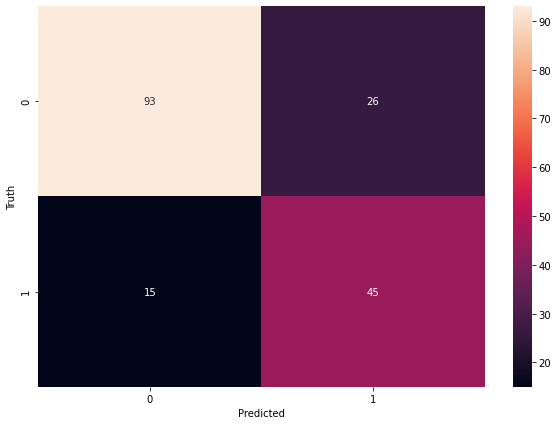

In [125]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
m,k, mmmmmmmmmmmmmmmmmmmmmm